<a href="https://colab.research.google.com/github/ujin2021/2021_DeepLearning/blob/master/14_deep_computer_vision_with_cnns_ksaehwa_2021_05_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 14 – Deep Computer Vision Using Convolutional Neural Networks**

_This notebook contains all the sample code in chapter 14._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

A couple utility functions to plot grayscale and RGB images:

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

# What is a Convolution?

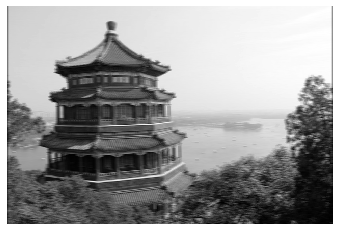

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

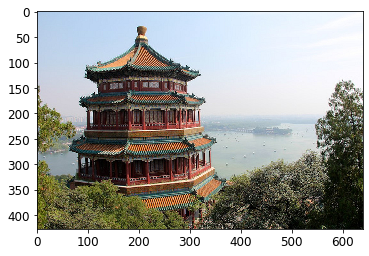

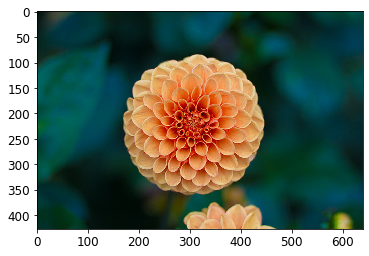

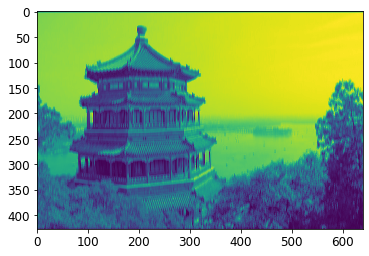

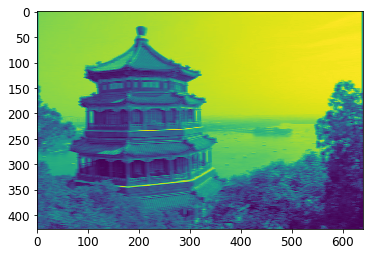

In [ ]:
plt.imshow(china)
plt.show()
plt.imshow(flower)
plt.show()
plt.imshow(outputs[0, :, :, 0]) # plot 1st image's 1st feature map
plt.show()
plt.imshow(outputs[0, :, :, 1]) # plot 1st image's 2nd feature map
plt.show()

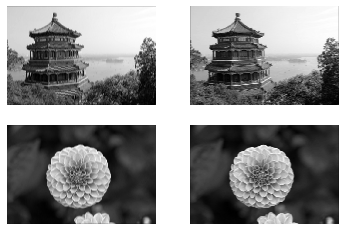

In [ ]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [ ]:
def crop(images):
    return images[150:220, 130:250]

Saving figure china_original


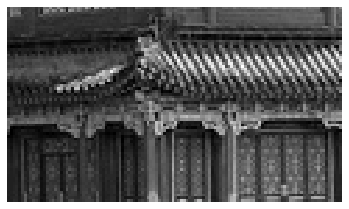

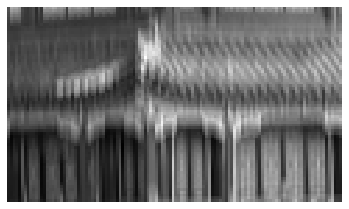

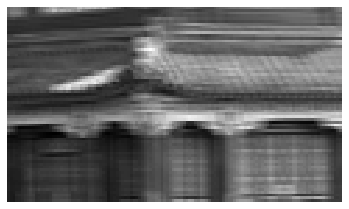

In [ ]:
plot_image(crop(images[0, :, :, 0]))
save_fig("china_original", tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    #save_fig(filename, tight_layout=False)
    plt.show()

images shape= (2, 427, 640, 3)
Saving figure china_original


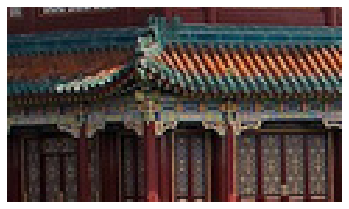

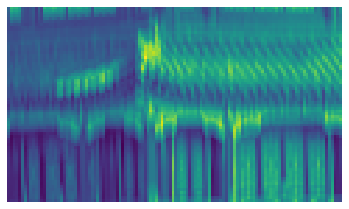

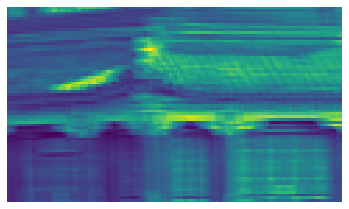

In [ ]:
print("images shape=", images.shape)
plot_color_image(crop(images[0, :, :, :]))
save_fig("china_original", tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_color_image(crop(outputs[0, :, :, feature_map_index]))
    #save_fig(filename, tight_layout=False)
    plt.show()

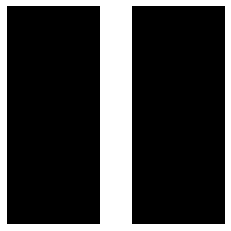

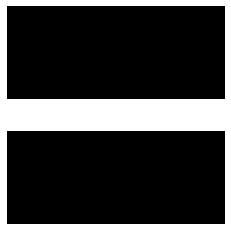

In [ ]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

[[10, 10, 10, 0, 0, 0], [10, 10, 10, 0, 0, 0], [10, 10, 10, 0, 0, 0], [0, 0, 0, 10, 10, 10], [0, 0, 0, 10, 10, 10], [0, 0, 0, 10, 10, 10]]


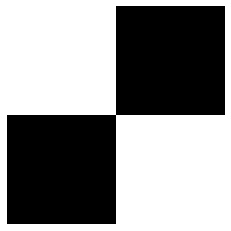

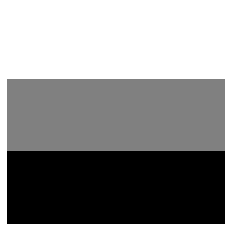

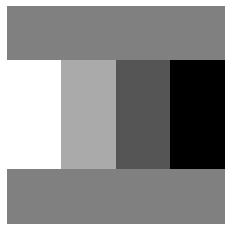

In [ ]:
a1 = [10, 10, 10, 0, 0, 0]
a2 = [0, 0, 0, 10, 10, 10]
a = [a1] * 3
a.extend([a2]*3)
print(a)
#plot_color_image(a)
plot_image(a)
plt.show()
b = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
plot_image(b)
plt.show()
c = [[0, 0, 0, 0], [30, 10, -10, -30], [30, 10, -10, -30], [0, 0, 0, 0]]
plot_image(c)
plt.show()

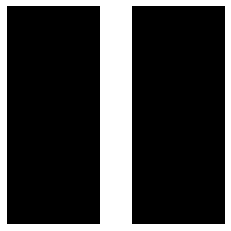

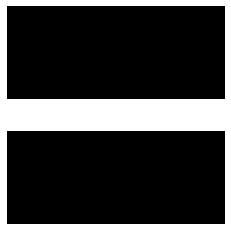

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]

In [ ]:
plot_color_image(filters[:, :, :, 0])
plt.show()
plot_color_image(filters[:, :, :, 1])
plt.show()
filters[:, :, :, 0]
# ksaehwa note
# purple	#800080	rgb(128,0,128)
# Yellow	#FFFF00	(255,255,0)
# https://www.colorspire.com/rgb-color-wheel/

## Convolutional Layer

Using `keras.layers.Conv2D()`:

In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

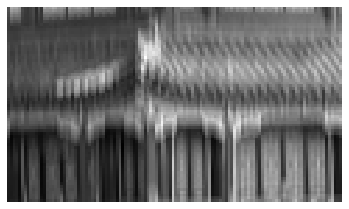

In [ ]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()

## VALID vs SAME padding

In [ ]:
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1

In [ ]:
def pad_before_and_padded_size(input_size, kernel_size, strides=1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size

In [ ]:
def manual_same_padding(images, kernel_size, strides=1):
    if kernel_size == 1:
        return images.astype(np.float32)
    batch_size, height, width, channels = images.shape
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)
    left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)
    padded_shape = [batch_size, padded_height, padded_width, channels]
    padded_images = np.zeros(padded_shape, dtype=np.float32)
    padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
    return padded_images

Using `"SAME"` padding is equivalent to padding manually using `manual_same_padding()` then using `"VALID"` padding (confusingly, `"VALID"` padding means no padding at all):

In [ ]:
kernel_size = 7
strides = 2

conv_valid = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="VALID")
conv_same = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="SAME")

valid_output = conv_valid(manual_same_padding(images, kernel_size, strides))

# Need to call build() so conv_same's weights get created
conv_same.build(tf.TensorShape(images.shape))

# Copy the weights from conv_valid to conv_same
conv_same.set_weights(conv_valid.get_weights())

same_output = conv_same(images.astype(np.float32))

assert np.allclose(valid_output.numpy(), same_output.numpy())

# Pooling layer

## Max pooling

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [ ]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

Saving figure china_max_pooling


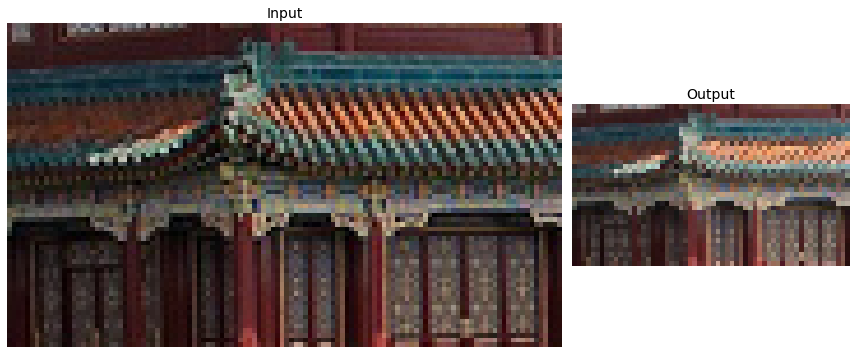

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
save_fig("china_max_pooling")
plt.show()

## Depth-wise pooling

In [ ]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.pool_size),
                              padding=self.padding)

In [ ]:
depth_pool = DepthMaxPool(3)
with tf.device("/cpu:0"): # there is no GPU-kernel yet
    depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

Or just use a `Lambda` layer:

In [ ]:
depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(
    X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID"))
with tf.device("/cpu:0"): # there is no GPU-kernel yet
    depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

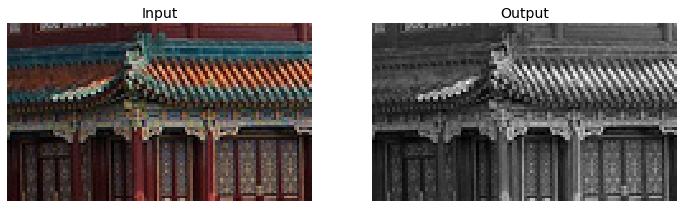

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plot_color_image(cropped_images[0])  # plot the 1st image
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plot_image(depth_output[0, ..., 0])  # plot the output for the 1st image
plt.axis("off")
plt.show()

## Average pooling

In [ ]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)

In [ ]:
output_avg = avg_pool(cropped_images)

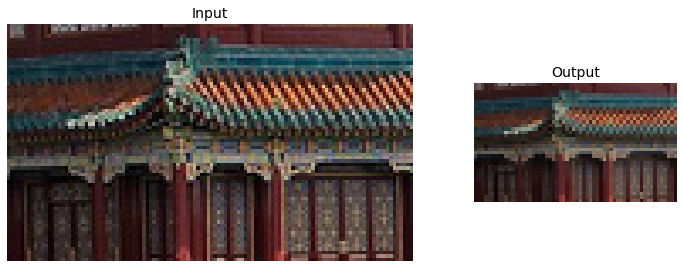

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [ ]:
# img_tensor = china.img_to_array(img)  --> AttributeError: 'numpy.ndarray' object has no attribute 'img_to_array'
img_tensor = china
#print(img_tensor)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

## Global Average Pooling

In [ ]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45951638, 0.33423486]], dtype=float32)>

In [ ]:
output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
output_global_avg2(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45951638, 0.33423486]], dtype=float32)>

# Tackling Fashion MNIST With a CNN

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_test_org = X_test[:] # ksaehwa

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
print(X_train.shape) # ksaehwa

X_train = X_train[..., np.newaxis]
print(X_train.shape) # ksaehwa

X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

(55000, 28, 28)
(55000, 28, 28, 1)


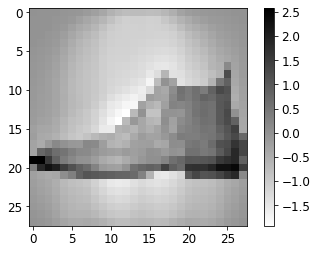

[[[-8.50525882e-03]
  [-2.27560269e-02]
  [-3.89675030e-02]
  [-4.12281027e-02]
  [-5.82534039e-02]
  [-7.07237542e-02]
  [-9.80052410e-02]
  [-1.56204970e-01]
  [-2.39456699e-01]
  [-3.77741560e-01]
  [-5.70428011e-01]
  [-6.93861337e-01]
  [-7.58059547e-01]
  [-7.48321209e-01]
  [-7.48453339e-01]
  [-7.74419557e-01]
  [-7.57517212e-01]
  [-6.47070810e-01]
  [-5.04646434e-01]
  [-3.20677403e-01]
  [-2.03425098e-01]
  [-1.39628116e-01]
  [-1.09701991e-01]
  [-9.14734908e-02]
  [-6.77413463e-02]
  [-5.00065920e-02]
  [-3.27325135e-02]
  [-1.37618738e-02]]

 [[-1.28614433e-02]
  [-1.83370414e-02]
  [-3.36992447e-02]
  [-5.60637214e-02]
  [-7.77566409e-02]
  [-1.30692397e-01]
  [-2.43712101e-01]
  [-3.63297622e-01]
  [-4.87224695e-01]
  [-6.42904810e-01]
  [-8.33877040e-01]
  [-1.00207215e+00]
  [-1.09061073e+00]
  [-1.08165966e+00]
  [-1.06535679e+00]
  [-1.10644794e+00]
  [-1.09002060e+00]
  [-9.39738356e-01]
  [-7.80206843e-01]
  [-5.93941186e-01]
  [-4.41232397e-01]
  [-3.16415534e-01

In [ ]:
plt.imshow(X_test[0][:, :, 0], cmap='binary')
plt.colorbar()
plt.show()
print(X_test[0])

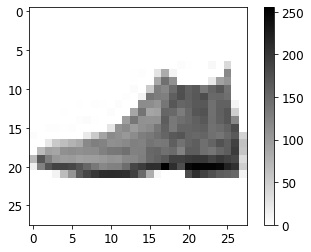

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

In [ ]:
plt.imshow(X_test_org[0], cmap='binary')
plt.colorbar()
plt.show()
print(X_test_org[0])

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1], name='conv1'),
    keras.layers.MaxPooling2D(pool_size=2, name='pool1'),
    DefaultConv2D(filters=128, name='conv2'),
    DefaultConv2D(filters=128, name='conv3'),
    keras.layers.MaxPooling2D(pool_size=2, name='pool2'),
    DefaultConv2D(filters=256, name='conv4'),
    DefaultConv2D(filters=256, name='conv5'),
    keras.layers.MaxPooling2D(pool_size=2, name='pool3'),
    keras.layers.Flatten(name='fltn1'),
    keras.layers.Dense(units=128, activation='relu', name='dens1'),
    keras.layers.Dropout(0.5, name='drop1'),
    keras.layers.Dense(units=64, activation='relu', name='dens2'),
    keras.layers.Dropout(0.5, name='drop2'),
    keras.layers.Dense(units=10, activation='softmax', name='dens3'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 64)        3200      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 128)       73856     
_________________________________________________________________
conv3 (Conv2D)               (None, 14, 14, 128)       147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv4 (Conv2D)               (None, 7, 7, 256)         295168    
_________________________________________________________________
conv5 (Conv2D)               (None, 7, 7, 256)         5

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.7265 - accuracy: 0.7457 - val_loss: 0.3697 - val_accuracy: 0.8682
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4364 - accuracy: 0.8543 - val_loss: 0.3750 - val_accuracy: 0.8682
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3704 - accuracy: 0.8762 - val_loss: 0.3036 - val_accuracy: 0.8936
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3348 - accuracy: 0.8890 - val_loss: 0.3042 - val_accuracy: 0.8886
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3079 - accuracy: 0.8955 - val_loss: 0.2958 - val_accuracy: 0.8992
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2941 - accuracy: 0.9007 - val_loss: 0.2714 - val_accuracy: 0.9020
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2820 - accuracy: 0.9047 - val_loss: 0.2862 - val_ac

img_tensor.shape (1, 28, 28, 1)
len_activations 8
first_activation.shape (1, 28, 28, 64)


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


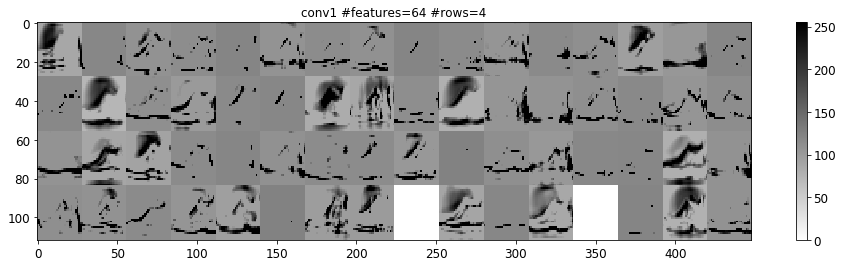

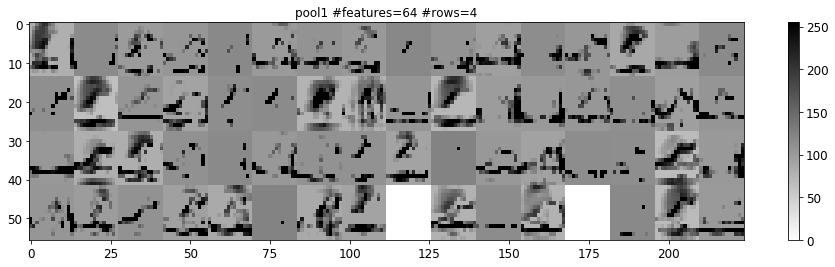

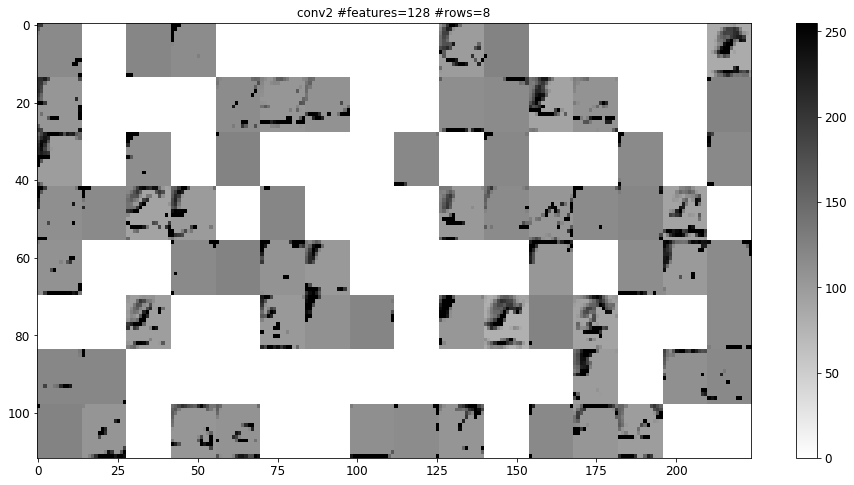

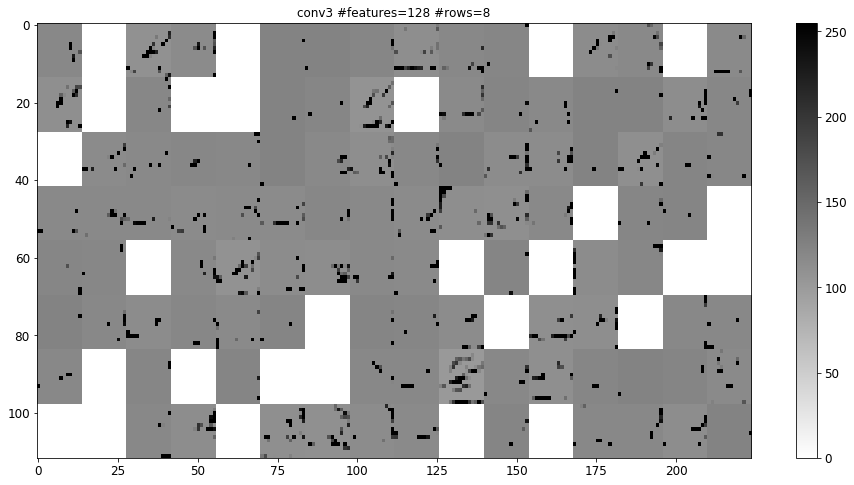

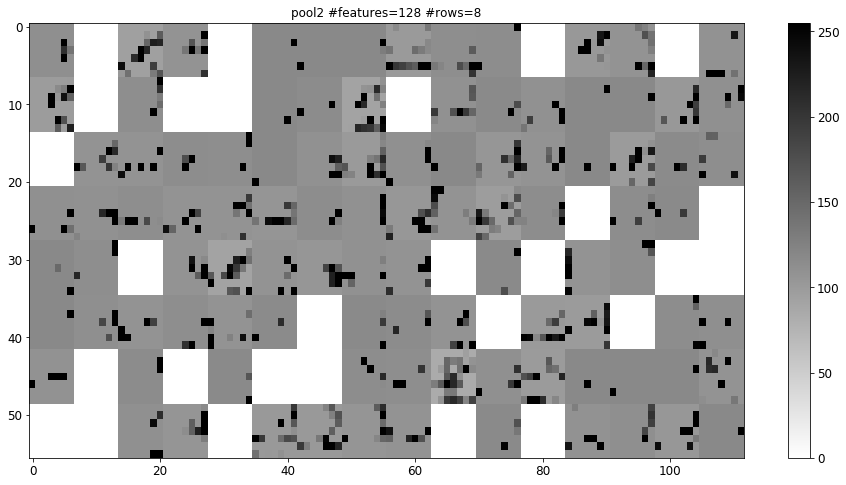

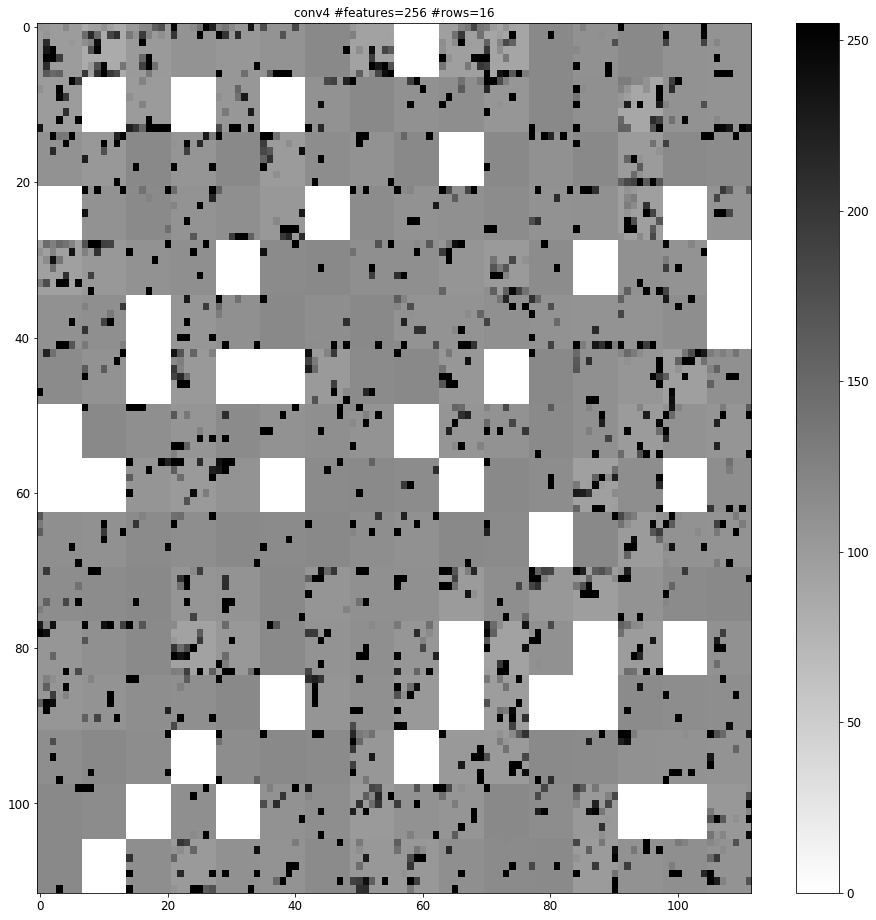

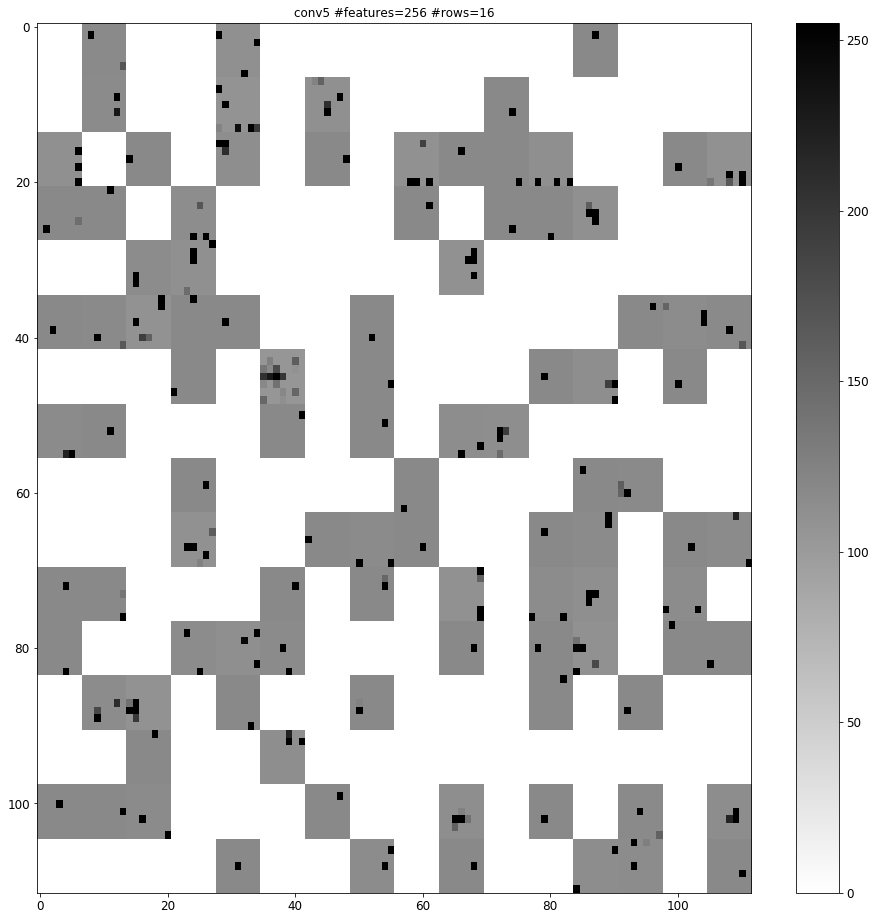

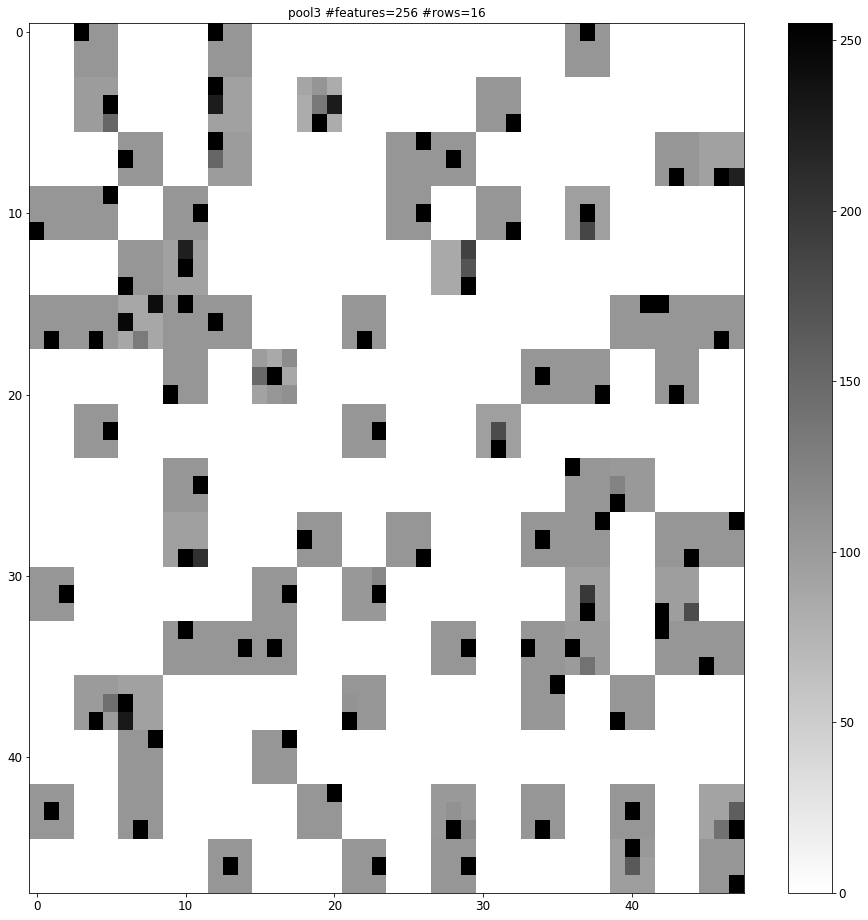

In [ ]:
# ksaehwa start
# from deep-learning-with-python-FrancoisChollet Ch. 5
# # Visualizing what CNN learn
# 
# It is often said that deep learning models are "black boxes", learning representations that are difficult 
# to extract and present in a human-readable form. 
# While this is partially true for certain types of deep learning models, 
# **it is definitely not true for CNNs**. 
# The representations learned by convnets are highly amenable to visualization, in large part because 
# **they are representations of visual concepts**. 
# Since 2013, a wide array of techniques have been developed for visualizing and interpreting these representations. 
# The following are three of the most accessible and useful ones:
# 
# - **Visualizing intermediate convnet outputs ("intermediate activations")**. This is useful to understand how successive convnet layers transform their input, and to get a first idea of the meaning of individual convnet filters.
# - **Visualizing convnets filters**. This is useful to understand precisely what visual pattern or concept each filter in a convnet is receptive to.
# - **Visualizing heatmaps of class activation in an image**. This is useful to understand which part of an image where identified as belonging to a given class, and thus allows to localize objects in images.

# ## Visualizing intermediate activations
# 
# Visualizing intermediate activations consists in displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its "activation", the output of the activation function). This gives a view into how an input is decomposed unto the different filters learned by the network. These feature maps we want to visualize have 3 dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel, as a 2D image.
layer_cnt = 8
layer_names = [layer.name for layer in model.layers[:layer_cnt]] 
# ksaehwa end
# take the output of the 8 layers on top of the network
layer_outputs = [layer.output for layer in model.layers[:layer_cnt]] 

activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

# ksaehwa start
img_tensor = X_test[:1] # one image 
print('img_tensor.shape', img_tensor.shape)
# ksaehwa end

# Using the model in prediction mode will return a list of numpy tensors equal to the number of activations. 8 in this case.
activations = activation_model.predict(img_tensor)
print('len_activations', len(activations))
#print('activations.shape', activations.shape) # impossible since activations is list


# As an example, the first output should return a numpy tensor of shape `148, 148, 132`, as specified by the `model.summary()` function
first_activation = activations[0]
print('first_activation.shape', first_activation.shape)


# #### Displaying activations
# Let's try plotting the first channel of the first activation we just found:
# ksaehwa commented below
#layer_names = []
#for layer in model.layers[:8]:
#    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    # ksaehwa comments: n_cols should be n_rows for its real meaning
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols): # ksaehwa: n_cols is actuallly n_rows
        for row in range(images_per_row): # ksaehwa: row is actually col
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            #'''
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            #'''
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    #plt.figure(figsize=(display_grid.shape[1],
    #                    display_grid.shape[0]))
    #plt.title(layer_name)
    # ksaehwa start
    plt.title(layer_name + " #features=" + str(n_features) + " #rows=" +str(n_cols))
    # ksaehwa end
    plt.grid(False)
    #plt.grid(True) # ksaehwa
    #plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.imshow(display_grid, aspect='auto', cmap='binary') # ksaehwa
    plt.colorbar() # ksaehwa

plt.show()


img_tensor.shape= (1, 28, 28, 1)


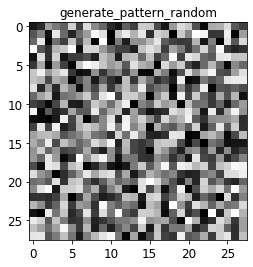

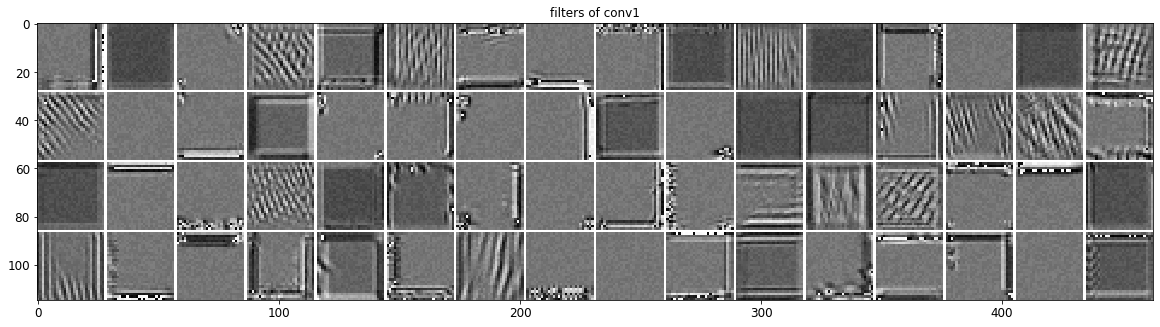

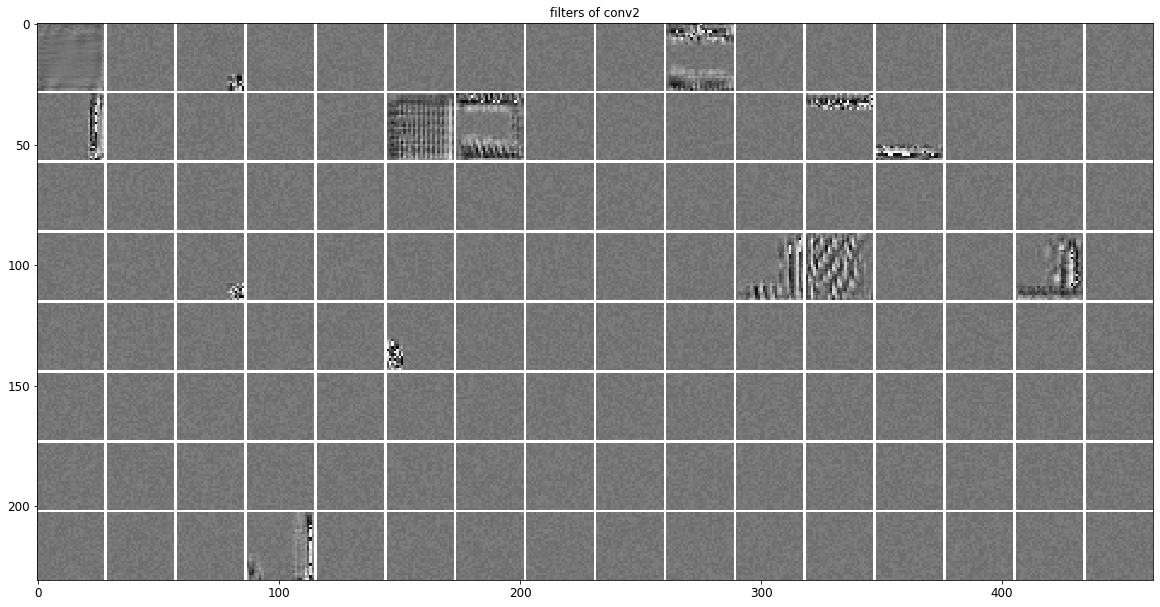

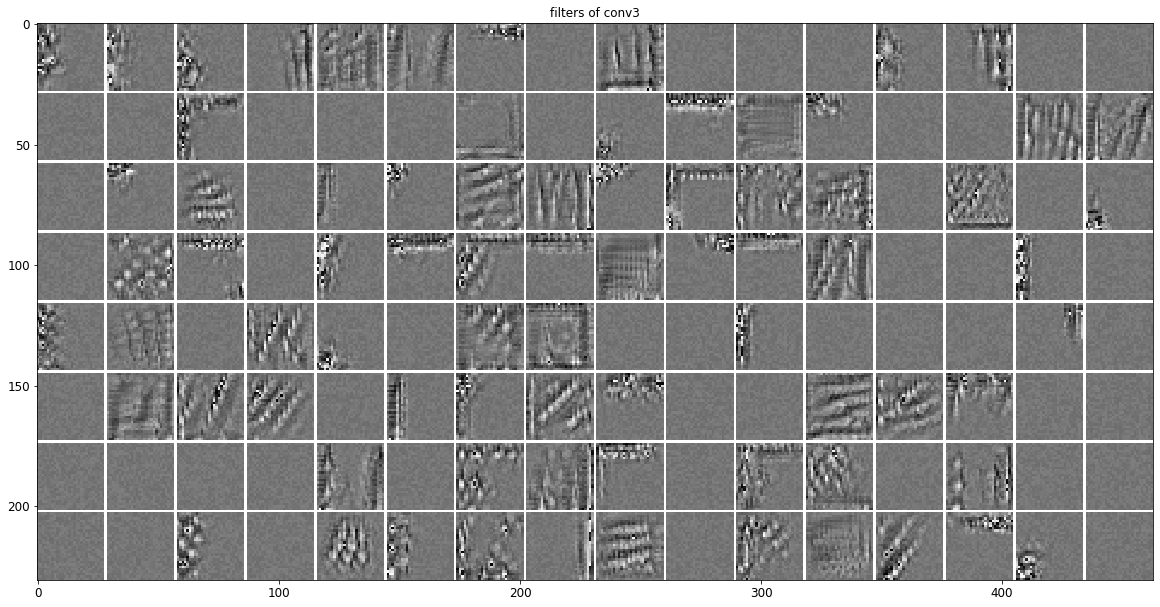

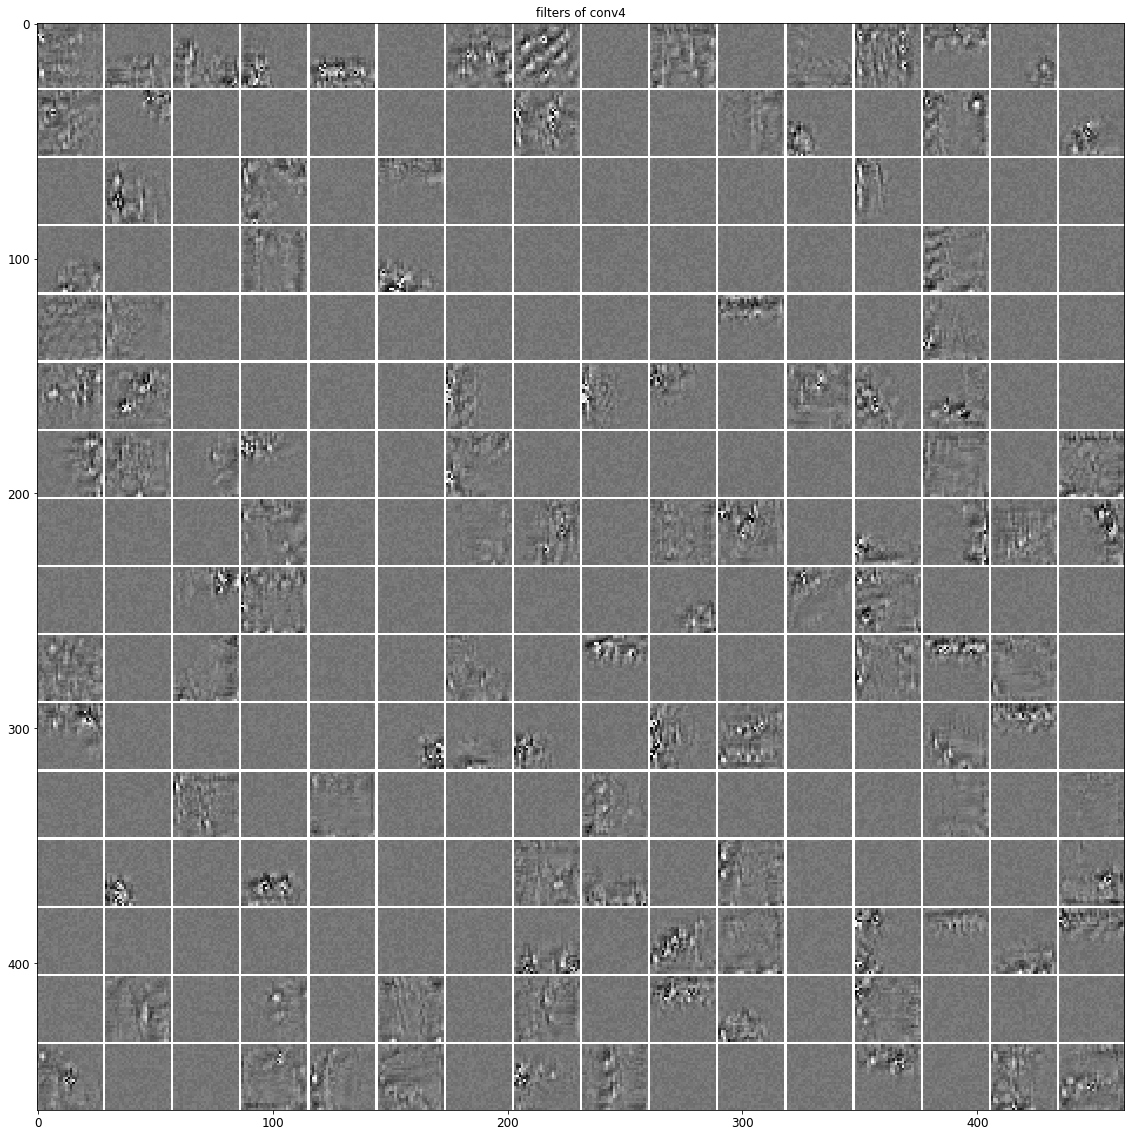

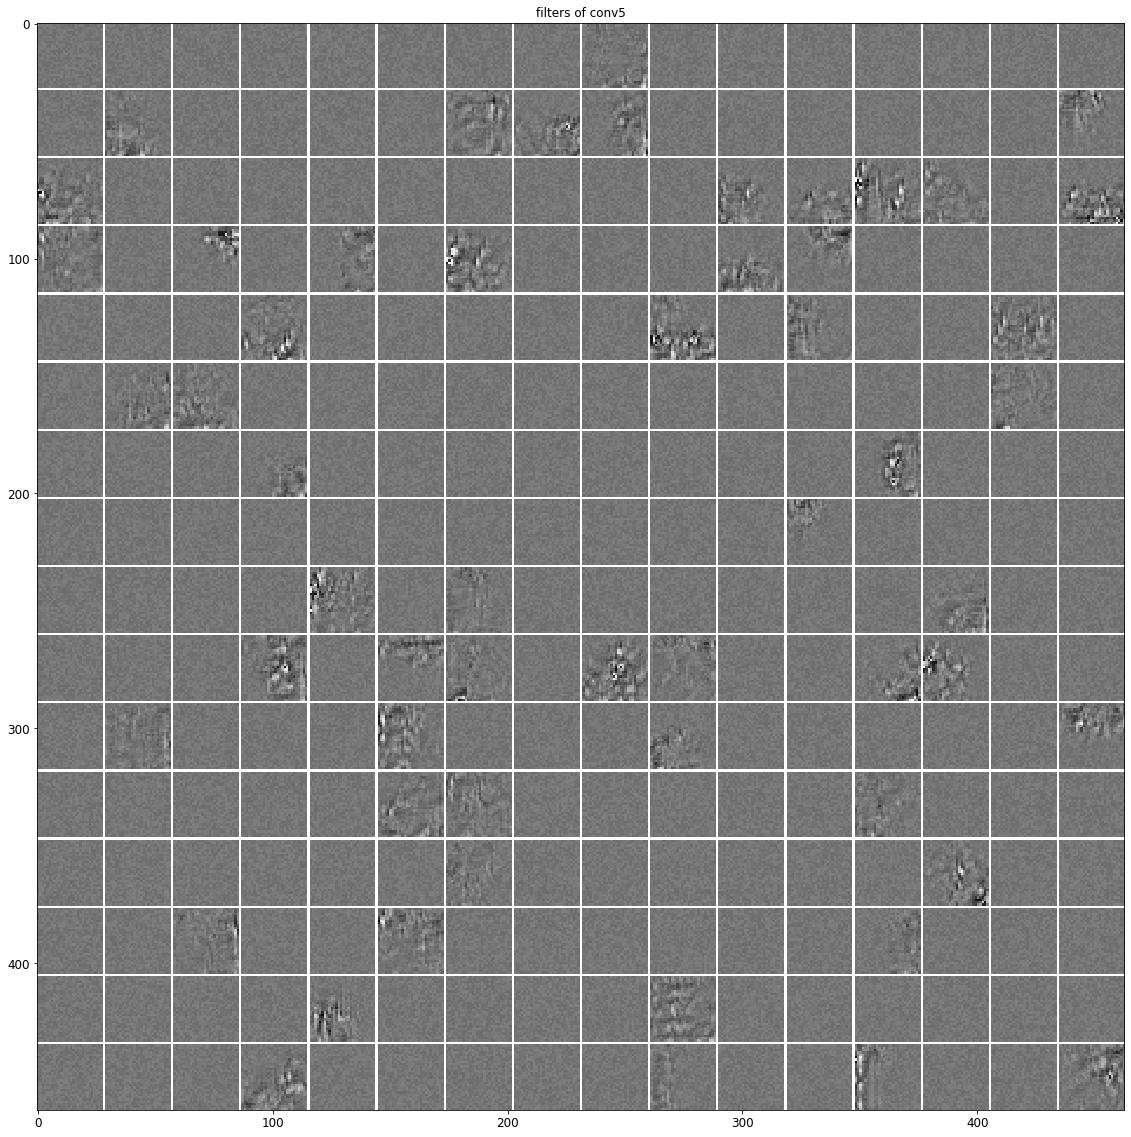

In [ ]:
# ksaehwa start
# from deep-learning-with-python-FrancoisChollet Ch. 5
# ksaehwa end


# ### Visualizing convnet filters
# 
# Another easy way to inspect the filters learned by CNNs is to display the visual pattern that each filter is meant to respond to. We'll build a loss function that maximizes the value of a given filter in a given convolutional layer, then we'll use a stochastic gradient descent to adjust the values of the input image so as to maximize the activation value.
# 
# In Tensorflow 2.0/Keras, the implementation of this method is only 4 steps:
# - perform the initial subgraph creation (same as before);
# - use the GradientTape object to capture the gradients on the input;
# - get the gradients with tape.gradient;
# - perform the gradient ascent with assign_add on the initial variable.
# 
# For instance, let's see the loss for the activation filter `0` in the layer `block3_conv1` of the VGG16 network.

#import tensorflow as tf
#from tensorflow.keras.applications import VGG16, vgg16
#from tensorflow.keras import backend as K
#from tensorflow.keras.applications.vgg16 import preprocess_input
#from tensorflow.keras import layers, preprocessing

#model = VGG16(weights='imagenet', include_top=False)
#model.summary()

size = 28 # ksaehwa
img_tensor = np.random.random((1, size, size, 1)) * 20 + 128. # ksaehwa
print('img_tensor.shape=', img_tensor.shape) # ksaehwa img_tensor.shape= (1, 28, 28, 1)
plt.title('generate_pattern_random')
plt.imshow(img_tensor[0][:,:,0], cmap='binary') # ksaehwa img_tensor
plt.show()
# Now we have all we need for getting the patterns from all the layers and filters. Let's put all together in a function: 

#def generate_pattern(layer_name, filter_index, size=150):
def generate_pattern(layer_name, filter_index, size=28): # ksaehwa
    #img_tensor = np.random.random((1, size, size, 3)) * 20 + 128.
    img_tensor = np.random.random((1, size, size, 1)) * 20 + 128. # ksaehwa
    img_tensor = tf.Variable(tf.cast(img_tensor, tf.float32))
    
    # Specify the convolution layer and the filter we want to connect to
    #conv_layer = model.get_layer("block3_conv1")
    conv_layer = model.get_layer(layer_name)
    step_size = 1
 
    # Create a connection between the input and the target layer
    submodel = keras.models.Model([model.inputs[0]], [conv_layer.output])

    # Run gradient ascent for 40 steps
    for _ in range(40):
        with tf.GradientTape() as tape:
            outputs = submodel(img_tensor)
            loss_value = tf.reduce_mean(outputs[:, :, :, filter_index])

        grads = tape.gradient(loss_value, img_tensor)
        # A non obvious trick to use to help the gradient descent process go smoothly is to normalize the gradient tensor by dividing it by its L2 norm (the square root ocf the average of the square of the values in the tensor). This ensures that the magnitude of the updates done to the input image is always within the same range.
        # 
        # After the normalization, we can perform the gradient ascent with `assign_add` on the initial variable. We should obtain a tensor of shape `(1, size, size, 3)`
        normalized_grads = grads / (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5) # Add a small costant at the end to avoid divisions by 0
        img_tensor.assign_add(normalized_grads * step_size)
    
    # Convert values input data to the valid range for imshow with RGB data ([0..255] for integers)
    img = img_tensor[0].numpy().astype(np.uint8) 
    
    #return img
    return img[:,:,0] # ksaehwa


# Display the response. It seems that filter 0 in layer `block3_conv1` is responsive to a *polka dot pattern*.

#plt.imshow(generate_pattern('block3_conv1', 0))
#plt.imshow(generate_pattern('conv2d_2', 0), cmap='gray') # ksaehwa
#plt.show()


# #### Visualize all filters in all layers
# 
# Now the fun part: we can start visualising every single filter in every layer. 
# For simplicity, we will only look at the first 64 filters in each layer, and will only look at the first layer 
# of each convolution block (block1_conv1, block2_conv1, block3_conv1, block4_conv1, block5_conv1). 
# We will arrange the outputs on a 8x8 grid of 64x64 filter patterns, with some black margins between each filter pattern.


#for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
for k in range(5): # ksaehwa
    layer_name = 'conv'+str(k+1) # ksaehwa

    column_cnt = 16 # ksaehwa
    row_cnt = model.get_layer(layer_name).output.shape[-1]//column_cnt # ksaehwa    
    #'''
    #size = model.get_layer(layer_name).output.shape[-2] #28, 14, 14, 7, 7 # ksaehwa # 64 
    #size = 3 # ksaehwa default kernel height/width
    #if k == 0: # ksaehwa
    #    size = 7 # ksaehwa
    #print(f'layer_name={layer_name} row_cnt={row_cnt} size={size}') # ksaehwa
    #'''
    margin = 1 #ksaehwa #  5
    
    # This a empty (black) image where we will store our results.
    #results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3)).astype(np.uint8)
    #results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 1)).astype(np.uint8) # ksaehwa
    #results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin)).astype(np.uint8) # ksaehwa
    results = np.zeros((row_cnt * size + (row_cnt-1) * margin, column_cnt * size + (column_cnt-1) * margin)).astype(np.uint8) # ksaehwa

    
    for i in range(row_cnt): #range(8):  ksaehwa # iterate over the rows of our results grid
        for j in range(column_cnt): #range(8): ksaehwa  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            #filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
            filter_img = generate_pattern(layer_name, i*column_cnt + j, size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            #results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
            #results[horizontal_start: horizontal_end, vertical_start: vertical_end, 0] = filter_img # ksaehwa
            results[horizontal_start: horizontal_end, vertical_start: vertical_end] = filter_img # ksaehwa

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.title('filters of '+layer_name) # ksaehwa
    #plt.imshow(results)
    plt.imshow(results, cmap='binary') # ksaehwa
    plt.show()


# These filter visualizations tell us a lot about how convnet layers see the world: **each layer in a convnet simply learns a collection of filters such that their inputs can be expressed as a combination of the filters**. This is similar to how the Fourier transform decomposes signals onto a bank of cosine functions. The filters in these convnet filter banks get increasingly complex and refined as we go higher-up in the model:
# 
# - The filters from the first layer in the model (block1_conv1) encode simple directional edges and colors (or colored edges in some cases).
# - The filters from block2_conv1 encode simple textures made from combinations of edges and colors.
# - The filters in higher-up layers start resembling textures found in natural images: feathers, eyes, leaves, etc.


In [ ]:
#!pip install opencv-python

     |████████████████████████████████| 50.4 MB 20.3 MB/s eta 0:00:01


In [ ]:
print(X_std)
X_std.shape

[[[9.61971687e-02 2.58073490e-01 7.99733982e-01 2.57899990e+00
   4.19702357e+00 5.73653217e+00 8.09474334e+00 1.41240996e+01
   2.38771581e+01 3.82435114e+01 5.77645355e+01 6.61367669e+01
   6.86350735e+01 6.79185250e+01 6.74162388e+01 6.95267002e+01
   6.79678765e+01 6.28086944e+01 5.17885180e+01 3.25200226e+01
   2.01948801e+01 1.41126825e+01 1.07159735e+01 9.06193986e+00
   6.83508975e+00 5.10441794e+00 2.93730741e+00 1.14281477e+00]
  [5.90913464e-01 1.40599662e+00 3.14331297e+00 6.54774424e+00
   9.73901031e+00 1.56539676e+01 2.99503164e+01 4.81275328e+01
   6.55715382e+01 8.20951451e+01 9.54730688e+01 9.98944946e+01
   1.03564792e+02 1.02699251e+02 1.02235080e+02 1.03602196e+02
   1.01454463e+02 9.69141322e+01 9.18679692e+01 7.58146080e+01
   5.92392832e+01 4.30256431e+01 2.96877161e+01 2.31952472e+01
   1.84739698e+01 1.33816346e+01 7.95816621e+00 2.93554123e+00]
  [1.75640020e+00 3.24439790e+00 5.78417794e+00 9.63319004e+00
   1.60974293e+01 3.51724880e+01 5.69774023e+01 6.926

(1, 28, 28)

[[ 1.32276659 -0.15965716  0.39670037 ...  0.34017123 -0.43283137
   1.12787455]
 [ 0.71859144  1.38972653 -1.18747924 ...  0.36201563  1.08598213
  -0.68008477]
 [-0.86600122 -1.31682508  0.06289727 ...  0.79550754  1.0383009
  -1.52575592]
 ...
 [ 0.54625587  0.96781764 -0.76188191 ... -0.03586967  0.12915408
   0.84217164]
 [-0.58669092 -1.27609538 -3.33365327 ...  0.14497882 -1.42443558
   1.8532889 ]
 [-0.74430343 -0.62824598  0.41957506 ... -0.78222763  0.09307645
  -2.08656772]]


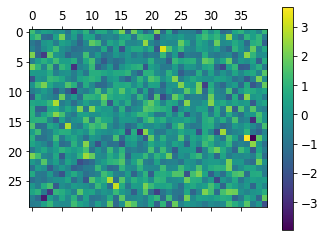

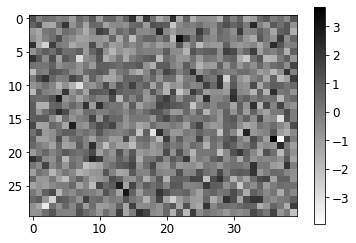

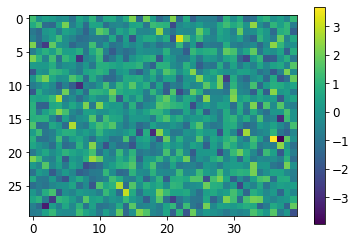

In [ ]:
arr = np.random.standard_normal((30, 40))
print(arr)
plt.matshow(arr)
plt.colorbar()
plt.show()

plt.imshow(arr, cmap='binary')
plt.colorbar()
plt.show()
plt.imshow(arr)
plt.colorbar()
plt.show()

x.shape (1, 28, 28, 1)


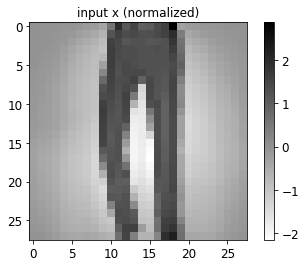

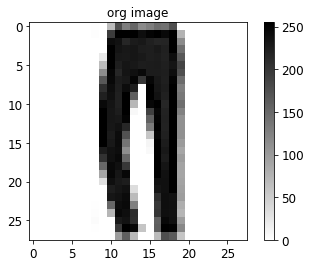

predictions.shape (1, 10)
conv_outputs.shape (1, 7, 7, 256)
loss.shape (1,)
predictions tf.Tensor(
[[1.1159884e-24 1.0000000e+00 7.2649665e-28 1.8111469e-14 2.7852722e-22
  5.6992641e-38 1.2163226e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00]], shape=(1, 10), dtype=float32)
conv_outputs tf.Tensor(
[[[[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   ...
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   ...
   [0.        0.        0.        ... 0.        0.        0.   

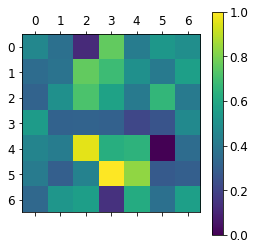

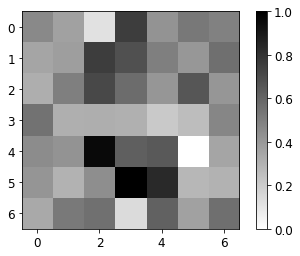

cv_img [[  0   0   0   0   0   0   0   0   1   0  67 177 129 153 117 129 146 141
  175   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0 196 255 255 255 241 251 255 245
  255  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 243 237 217 228 231 222 218 219
  255 116   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 235 231 233 226 225 229 222
  255 145   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  23 255 230 229 233 229 225 227 221
  241 167   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67 255 225 234 231 226 227 228 224
  234 187   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 114 249 217 235 238 245 227 227 225
  241 176   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 167 247 227 231 250 200 248 231 224
  251 147   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 208 242 225 243 225

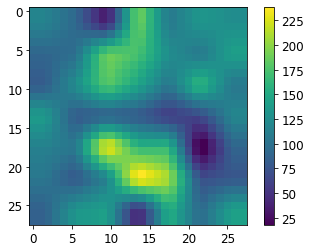

cv_img after unit8 [[  0   0   0   0   0   0   0   0   1   0  67 177 129 153 117 129 146 141
  175   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0 196 255 255 255 241 251 255 245
  255  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 243 237 217 228 231 222 218 219
  255 116   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 235 231 233 226 225 229 222
  255 145   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  23 255 230 229 233 229 225 227 221
  241 167   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67 255 225 234 231 226 227 228 224
  234 187   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 114 249 217 235 238 245 227 227 225
  241 176   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 167 247 227 231 250 200 248 231 224
  251 147   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 208 242

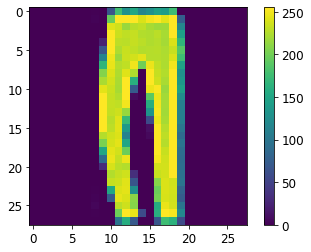

cv_img.shape (28, 28, 3)
cv_img after BONE [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


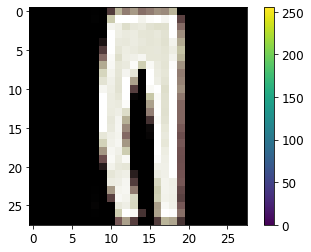

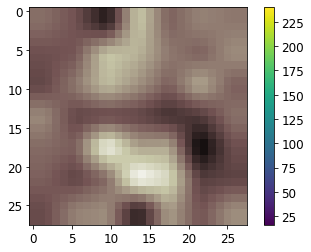

[[[80 66 61]
  [80 66 61]
  [79 64 60]
  ...
  [85 72 66]
  [85 71 65]
  [85 71 65]]

 [[80 66 61]
  [80 66 61]
  [79 64 60]
  ...
  [85 72 66]
  [85 71 65]
  [85 71 65]]

 [[79 64 60]
  [79 64 60]
  [77 61 58]
  ...
  [86 74 67]
  [86 74 67]
  [86 74 67]]

 ...

 [[64 46 46]
  [64 46 46]
  [67 49 49]
  ...
  [87 74 68]
  [90 79 71]
  [90 79 71]]

 [[62 45 45]
  [62 45 45]
  [67 48 48]
  ...
  [91 80 72]
  [94 85 75]
  [94 85 75]]

 [[62 45 45]
  [62 45 45]
  [67 48 48]
  ...
  [91 80 72]
  [94 85 75]
  [94 85 75]]]


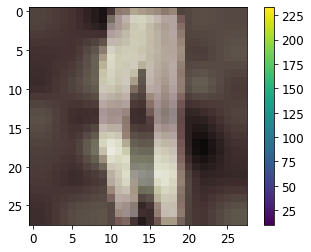

In [ ]:
# from deep-learning-with-python-FrancoisChollet Ch. 5
# ### Visualizing heatmaps of class activation
# 
# This technique is helpful for "debugging" the decision process of a convnet, in particular in case of a classification mistake. It also allows you to locate specific objects in an image.
# 
# This general category of techniques is called **Class Activation Map (CAM) visualization**, and consists in producing heatmaps of "class activation" over input images. A "class activation" heatmap is a 2D grid of scores associated with an specific output class, computed for every location in any input image, indicating **how important each location is with respect to the class considered**. For instance, given a image fed into one of our "cat vs. dog" convnet, Class Activation Map visualization allows us to generate a heatmap for the class "cat", indicating how cat-like different parts of the image are, and likewise for the class "dog", indicating how dog-like differents parts of the image are.
# 
# The specific implementation we will use is the one described in [Grad-CAM: Why did you say that? Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391). 
# It consists in taking the output feature map of a convolution layer given an input image, and weighing every channel in that feature map by the gradient of the class with respect to the channel. Intuitively, one way to understand this trick is that we are weighting a spatial map of "how intensely the input image activates different channels" by "how important each channel is with regard to the class", resulting in a spatial map of "how intensely the input image activates the class".
# 
# We will demonstrate this technique using the pre-trained VGG16 network again:
'''
IMG_PATH = './resources/creative_commons_elephant.jpg'

model = VGG16(weights='imagenet')
img = image.load_img(IMG_PATH, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

input_img = x / 255
plt.imshow(input_img[0])
plt.show()
'''
from keras.preprocessing import image # ksaehwa
#img = X_test[2][:, :, 0] # ksaehwa, trouser
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#plt.imshow(img[:, :, 0])

testImgIdx = 2# 0#1# ksaehwa 
#x = X_test[2:3] # ksaehwa trouser: it should not be [2] due to shape
#x = X_test[0:1] # ksaehwa anker
x = X_test[testImgIdx:testImgIdx+1] # ksaehwa

print('x.shape', x.shape) # ksaehwa
plt.title('input x (normalized)') # ksaehwa
plt.imshow(x[0][:, :, 0], cmap='binary') # ksaehwa
plt.colorbar()
plt.show() 

plt.title('org image') # ksaehwa
#plt.imshow(X_test_org[0], cmap='binary') # ksaehwa 0 for ankle boot, 2 for trouser 
plt.imshow(X_test_org[testImgIdx], cmap='binary') # ksaehwa 0 for ankle boot, 2 for trouser 
plt.colorbar()
plt.show()

'''
plt.imshow(x[0][:, :, 0])
plt.axis("off")
plt.show()
'''

#x = preprocess_input(x)

'''
# Running a prediction with the input image above and decoding it in a readable way, we get:

from tensorflow.keras.applications.vgg16 import decode_predictions

x = preprocess_input(x)

preds = model.predict(x)
print(f"Predicted: {decode_predictions(preds, top=3)[0]}")

# We got the top 3 classes, and the entry in the prediction vector that has been maximally activated is the one corresponding to the `African_elephant` class, at index 386 (see below)
np.argmax(preds[0])
'''




# In order to visualize which parts of the image are most "African elephant-like", we have to setup a Grad-CAM process. 
# Tensorflow 2 allows to do that through **automatic differentiation** and what TensorFlow calls a **gradient tape**, 
# which we have used also for the previous exercise about filter visualization.
# 
# Automatic differentiation is the **process of computing a value and computing derivatives of that value**.
# TensorFlow 2 provides an implementation of automatic differentiation through what they call gradient tape:
# _TensorFlow provides the tf.GradientTape API for automatic differentiation 
# — computing the gradient of a computation with respect to its input variables. 
# TensorFlow “records” all operations executed inside the context of a tf.GradientTape onto a “tape”. 
# TensorFlow then uses that tape and the gradients associated with each recorded operation 
# to compute the gradients of a “recorded” computation using reverse mode differentiation”_.
# The gradients are calculated through automatic differentiation. 

import cv2

#AFRICAN_ELEPHANT_CLASS_IDX = 386
TROUSER_IDX = 1 # ksaehwa
ANKLE_BOOT_IDX = 9 # ksaehwa
PULLOVER_IDX = 2 # ksaehwa
testImgIdx2TargetIdx = [ANKLE_BOOT_IDX, PULLOVER_IDX, TROUSER_IDX] # ksaehwa

#last_conv_layer = model.get_layer('block5_conv3') # Output feature map of the last conv level of VGG16
last_conv_layer = model.get_layer('conv5') # ksaehwa

# Construct the gradient model by supplying:
# (1) the inputs to our pre-trained model;
# (2) the output of the last convolutional layer in the network;
# (3) the output of the softmax activations from the model
#grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])
grad_model = keras.models.Model([model.inputs], [last_conv_layer.output, model.output]) # ksaehwa

# Set up GradientTape for automatic differentiation
with tf.GradientTape() as tape:
    # pass the image through the gradient model, and grab the loss associated with the specific class index
    conv_outputs, predictions = grad_model(x)
    #loss = predictions[:, AFRICAN_ELEPHANT_CLASS_IDX] 
    #loss = predictions[:, TROUSER_IDX] # ksaehwa
    #loss = predictions[:, ANKLE_BOOT_IDX] # ksaehwa
    loss = predictions[:, testImgIdx2TargetIdx[testImgIdx]] # ksaehwa 

output = conv_outputs[0]

print('predictions.shape', predictions.shape)
print('conv_outputs.shape', conv_outputs.shape)
print('loss.shape', loss.shape)
print('predictions', predictions)
print('conv_outputs', conv_outputs)
print('loss', loss)

# Compute the gradients of the "African elephant" class with regard to the output 
# feature map of block5_conv3, given a sample image
grads = tape.gradient(loss, conv_outputs)[0]
print('grads', grads)

# Vector of shape (512), where each entry is the mean intensity of the gradient over a specific feature map channel
weights = tf.reduce_mean(grads, axis=(0, 1))
print('weights', weights)
print('argmax(weights) and that weight=', np.argmax(weights), weights[np.argmax(weights)])

# Multiplies each channel in feature-map array by "how important this channel is" with regard to the elephant class.
cam = tf.multiply(weights, output)
print('cam', cam)

# The channel-wise mean of the resulting feature map is the heatmap of the class activation!
heatmap = tf.reduce_mean(cam, axis=-1).numpy()
print('heatmap org', heatmap)


# #### Visualize the heatmap

# Postprocessing heatmap
heatmap = (heatmap - np.min(heatmap)) / (heatmap.max() - heatmap.min())
print('heatmap after preprocessing', heatmap)

plt.matshow(heatmap)
plt.colorbar()
plt.show()

plt.imshow(heatmap, cmap='binary')
plt.colorbar()
plt.show()

# #### Generate superimposed original image over the heatmap
# Use cv2 to load the original image
#cv_img = cv2.imread(IMG_PATH)
#cv_img = x[0][:, :, 0] # ksaehwa, trouser
#cv_img = X_test_org[0] # ksaehwa, 0 ankle boot, 2 trouser
cv_img = X_test_org[testImgIdx] # ksaehwa, 0 ankle boot, 2 trouser

print('cv_img', cv_img)

# Resize the heatmap to be the same as the original image
heatmap = cv2.resize(heatmap, (cv_img.shape[1], cv_img.shape[0]))

# Converts heatmap to RGB
heatmap = (heatmap * 255).astype(np.uint8)
plt.imshow(heatmap) #, cmap='gray'
plt.colorbar()
plt.show()


#cv_img = ((255-cv_img)).astype(np.uint8) # ksaehwa
cv_img = (cv_img).astype(np.uint8) # ksaehwa
print('cv_img after unit8', cv_img)
plt.imshow(cv_img) #, cmap='gray'
plt.colorbar()
plt.show()
#cv_img = (cv_img *X_std[0] + X_mean[0]).astype(np.uint8) # ksaehwa
#plt.imshow(cv_img) #, cmap='gray'
#plt.show()

#cv_img = cv2.imread('trouser.png', 0) # ksaehwa
cv_img = cv2.applyColorMap(cv_img, cv2.COLORMAP_BONE) # ksaehwa
#cv_img = cv2.applyColorMap(cv_img, cv2.COLORMAP_HOT) # ksaehwa
print('cv_img.shape', cv_img.shape)
print('cv_img after BONE', cv_img)
plt.imshow(cv_img) #, cmap='gray'
plt.colorbar()
plt.show()

# Apply a color map to the heatmap
#heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT) # ksaehwa
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_BONE) # ksaehwa
plt.imshow(heatmap) #, cmap='gray'
plt.colorbar()
plt.show()

# Applies the heatmap to the original image. The variable alpha is a heatmap intensity factor
alpha = 0.4 # org
#alpha = 0.8 # ksaehwa
output_image = cv2.addWeighted(cv_img, alpha, heatmap, 1 - alpha, 0)
print(output_image)
plt.imshow(output_image) #, cmap='gray'
plt.colorbar()
plt.show()

#cv2.imwrite('./resources/elephant_cam.jpg', output_image)
# <img src="./resources/elephant_cam.jpg">
# 
# It is interesting to note that the ears of the elephant cub are strongly activated: 
# this is probably how the network can tell the difference between African and Indian elephants.

## ResNet-34

In [ ]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [ ]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

## Using a Pretrained Model

In [ ]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102973440/102967424 [==============================] - 9s 0us/step


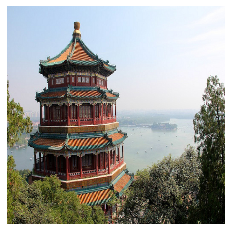

In [ ]:
images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


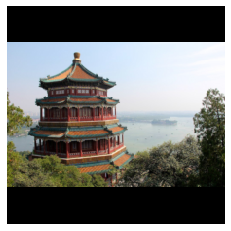

In [ ]:
images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
plot_color_image(images_resized[0])

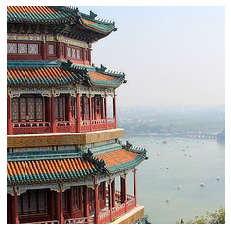

In [ ]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plot_color_image(images_resized[0])
plt.show()

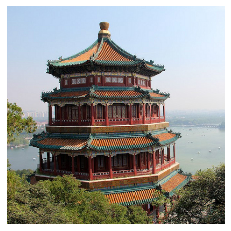

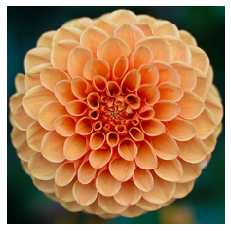

In [ ]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

In [ ]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs)

In [ ]:
Y_proba.shape

(2, 1000)

In [ ]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

40960/35363 [==================================] - 0s 1us/step
Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.07%
  n03781244 - monastery    11.70%

Image #1
  n04522168 - vase         53.96%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.97%



## Pretrained Models for Transfer Learning

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /home/work/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
info.splits

{'train': <SplitInfo num_examples=3670, num_shards=2>}

In [ ]:
info.splits["train"]

<SplitInfo num_examples=3670, num_shards=2>

In [ ]:
class_names = info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [ ]:
n_classes = info.features["label"].num_classes

In [ ]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

**Warning:** TFDS's split API has evolved since the book was published. The [new split API](https://www.tensorflow.org/datasets/splits) (called S3) is much simpler to use:

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

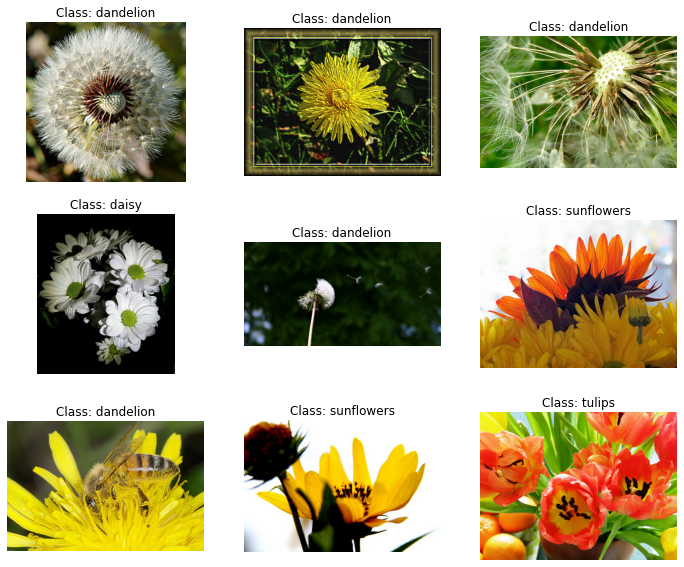

In [ ]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

Basic preprocessing:

In [ ]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

Slightly fancier preprocessing (but you could add much more data augmentation):

In [ ]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


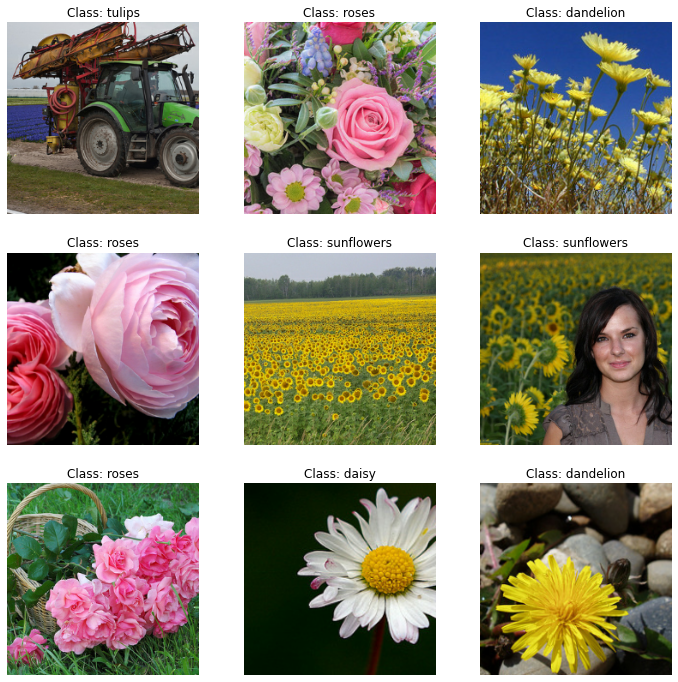

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

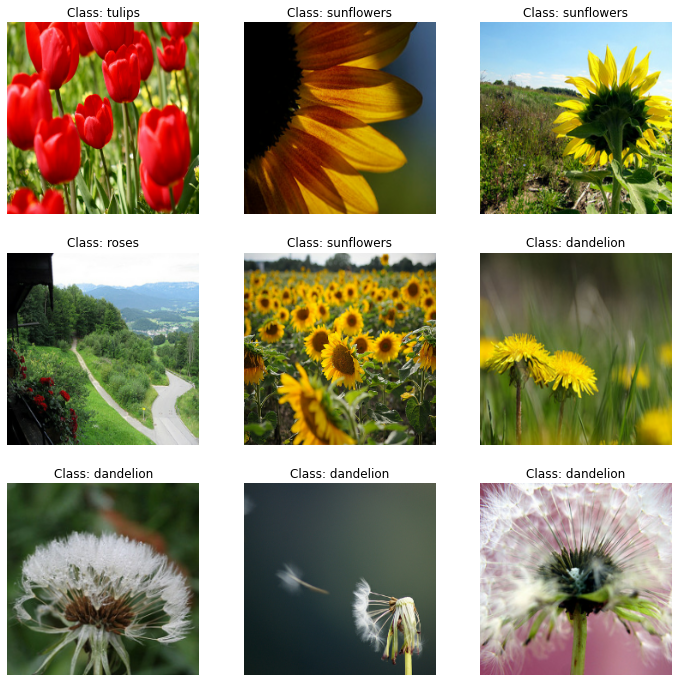

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 7s 0us/step


In [ ]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_44
13 block2_pool
14 batch_normalization_36
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_45
23 block3_pool
24 batch_normalization_37
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_46
33 block4_pool
34 batch_normalization_38
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 18s 72ms/step - loss: 1.7569 - accuracy: 0.6809 - val_loss: 1.1512 - val_accuracy: 0.8438
Epoch 2/5
86/86 [==============================] - 5s 62ms/step - loss: 0.7089 - accuracy: 0.8841 - val_loss: 0.8787 - val_accuracy: 0.8658
Epoch 3/5
86/86 [==============================] - 5s 61ms/step - loss: 0.3703 - accuracy: 0.9293 - val_loss: 0.8197 - val_accuracy: 0.8585
Epoch 4/5
86/86 [==============================] - 5s 61ms/step - loss: 0.2302 - accuracy: 0.9436 - val_loss: 0.7751 - val_accuracy: 0.8548
Epoch 5/5
86/86 [==============================] - 5s 61ms/step - loss: 0.1600 - accuracy: 0.9545 - val_loss: 0.6974 - val_accuracy: 0.8805


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

Epoch 1/40
86/86 [==============================] - 50s 299ms/step - loss: 0.4709 - accuracy: 0.8634 - val_loss: 0.5394 - val_accuracy: 0.8585
Epoch 2/40
86/86 [==============================] - 25s 291ms/step - loss: 0.1401 - accuracy: 0.9655 - val_loss: 0.3180 - val_accuracy: 0.9099
Epoch 3/40
86/86 [==============================] - 25s 289ms/step - loss: 0.0703 - accuracy: 0.9794 - val_loss: 0.3045 - val_accuracy: 0.9136
Epoch 4/40
86/86 [==============================] - 25s 290ms/step - loss: 0.0368 - accuracy: 0.9847 - val_loss: 0.3211 - val_accuracy: 0.9136
Epoch 5/40
86/86 [==============================] - 25s 289ms/step - loss: 0.0315 - accuracy: 0.9885 - val_loss: 0.2997 - val_accuracy: 0.9173
Epoch 6/40
86/86 [==============================] - 25s 291ms/step - loss: 0.0390 - accuracy: 0.9888 - val_loss: 0.2607 - val_accuracy: 0.9283
Epoch 7/40
86/86 [==============================] - 25s 289ms/step - loss: 0.0168 - accuracy: 0.9961 - val_loss: 0.2746 - val_accuracy: 0.9246

# Classification and Localization

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.models.Model(inputs=base_model.input,
                           outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[0.8, 0.2], # depends on what you care most about
              optimizer=optimizer, metrics=["accuracy"])

In [ ]:
def add_random_bounding_boxes(images, labels):
    fake_bboxes = tf.random.uniform([tf.shape(images)[0], 4])
    return images, (labels, fake_bboxes)

fake_train_set = train_set.take(5).repeat(2).map(add_random_bounding_boxes)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
model.fit(fake_train_set, steps_per_epoch=5, epochs=2)

Epoch 1/2
5/5 [==============================] - 5s 280ms/step - loss: 1.3813 - dense_5_loss: 1.6341 - dense_6_loss: 0.3699 - dense_5_accuracy: 0.2519 - dense_6_accuracy: 0.1648
Epoch 2/2
5/5 [==============================] - 1s 280ms/step - loss: 1.3259 - dense_5_loss: 1.5694 - dense_6_loss: 0.3519 - dense_5_accuracy: 0.2786 - dense_6_accuracy: 0.2037


### Mean Average Precision (mAP)

In [ ]:
def maximum_precisions(precisions):
    return np.flip(np.maximum.accumulate(np.flip(precisions)))

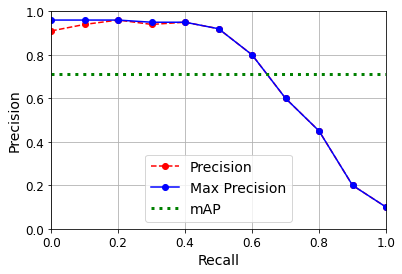

In [ ]:
recalls = np.linspace(0, 1, 11)

precisions = [0.91, 0.94, 0.96, 0.94, 0.95, 0.92, 0.80, 0.60, 0.45, 0.20, 0.10]
max_precisions = maximum_precisions(precisions)
mAP = max_precisions.mean()
plt.plot(recalls, precisions, "ro--", label="Precision")
plt.plot(recalls, max_precisions, "bo-", label="Max Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [mAP, mAP], "g:", linewidth=3, label="mAP")
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower center", fontsize=14)
plt.show()

Transpose convolutions:

In [ ]:
tf.random.set_seed(42)
X = images_resized.numpy()

conv_transpose = keras.layers.Conv2DTranspose(filters=5, kernel_size=3, strides=2, padding="VALID")
output = conv_transpose(X)
output.shape

TensorShape([2, 449, 449, 5])

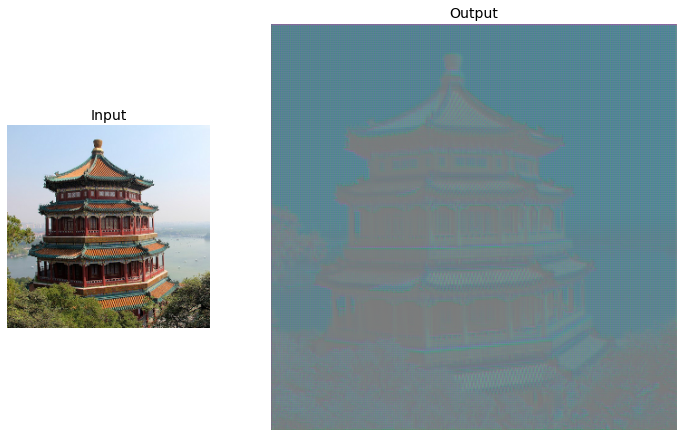

In [ ]:
def normalize(X):
    return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(normalize(output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [ ]:
def upscale_images(images, stride, kernel_size):
    batch_size, height, width, channels = images.shape
    upscaled = np.zeros((batch_size,
                         (height - 1) * stride + 2 * kernel_size - 1,
                         (width - 1) * stride + 2 * kernel_size - 1,
                         channels))
    upscaled[:,
             kernel_size - 1:(height - 1) * stride + kernel_size:stride,
             kernel_size - 1:(width - 1) * stride + kernel_size:stride,
             :] = images
    return upscaled

In [ ]:
upscaled = upscale_images(X, stride=2, kernel_size=3)
weights, biases = conv_transpose.weights
reversed_filters = np.flip(weights.numpy(), axis=[0, 1])
reversed_filters = np.transpose(reversed_filters, [0, 1, 3, 2])
manual_output = tf.nn.conv2d(upscaled, reversed_filters, strides=1, padding="VALID")

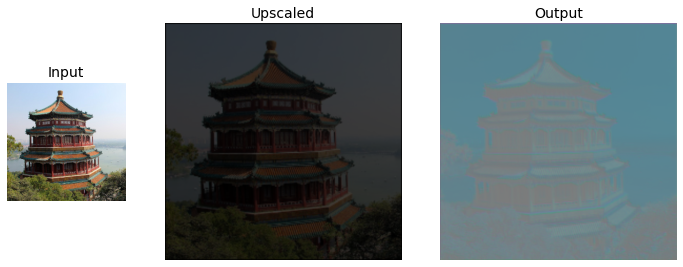

In [ ]:
def normalize(X):
    return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1, 2, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Upscaled", fontsize=14)
ax2.imshow(upscaled[0], interpolation="bicubic")
ax2.axis("off")
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_title("Output", fontsize=14)
ax3.imshow(normalize(manual_output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
ax3.axis("off")
plt.show()

In [ ]:
np.allclose(output, manual_output.numpy(), atol=1e-7)

True

# Exercises

## 1. to 8.

See appendix A.

## 9. High Accuracy CNN for MNIST
_Exercise: Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST._

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the [MNIST Kaggle competition](https://www.kaggle.com/c/digit-recognizer/) (if we ignore the models with an accuracy greater than 99.79% which were most likely trained on the test set, as explained by Chris Deotte in [this post](https://www.kaggle.com/c/digit-recognizer/discussion/61480)). Can you do better? To reach 99.5 to 99.7% accuracy on the test set, you need to add image augmentation, batch norm, use a learning schedule such as 1-cycle, and possibly create an ensemble.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 28s 13ms/step - loss: 0.3730 - accuracy: 0.8827 - val_loss: 0.0458 - val_accuracy: 0.9874
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0800 - accuracy: 0.9756 - val_loss: 0.0409 - val_accuracy: 0.9888
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0365 - val_accuracy: 0.9902
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0341 - val_accuracy: 0.9914
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0426 - val_accuracy: 0.9900
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.0394 - val_accuracy: 0.9890
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0350 - val_a

[0.027801593765616417, 0.9916999936103821]

## 10.  Use transfer learning for large image classification

_Exercise: Use transfer learning for large image classification, going through these steps:_

* _Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets)._
* _Split it into a training set, a validation set, and a test set._
* _Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation._
* _Fine-tune a pretrained model on this dataset._

See the Flowers example above.

## 11.
_Exercise: Go through TensorFlow's [Style Transfer tutorial](https://homl.info/styletuto). It is a fun way to generate art using Deep Learning._


Simply open the Colab and follow its instructions.